# Clean data

In [1]:
import pandas as pd
import utils
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
df_1 = pd.read_csv("sp500-info.csv", index_col="Date", parse_dates=True)
df_1.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-23,62.521873,10.25,76.780159,55.566658,58.500195,71.623451,132.339996,60.947273,139.870514,307.269989,...,57.570000,48.351284,27.525692,31.492746,55.360428,54.530045,77.300705,170.720001,23.084974,91.612640
2020-03-24,66.103294,13.92,84.487518,61.141407,61.212063,77.358749,143.669998,67.612480,152.680710,310.000000,...,66.559998,52.267742,31.017820,33.378361,60.599335,67.207420,89.343971,180.550003,24.139519,102.587173
2020-03-25,68.076515,15.39,88.390114,60.804588,61.593002,72.999146,146.889999,68.640869,147.784409,305.910004,...,75.059998,53.718277,32.636982,34.553169,62.417316,70.304398,92.625023,186.229996,24.781836,106.986877
2020-03-26,72.733368,15.66,94.992233,64.004311,66.962318,81.534279,149.169998,73.550034,166.785522,322.670013,...,71.510002,56.000458,33.976070,39.008453,66.473564,73.083000,96.717361,197.509995,26.239023,116.577225
2020-03-27,69.960960,14.04,93.505516,61.354385,65.910217,79.228539,145.240005,72.337288,158.550430,305.829987,...,63.310001,56.832096,32.339405,37.553059,64.020264,66.117195,91.049530,184.570007,26.440346,110.506630


In [2]:
print(sum(df_1.isna().sum() != 0), "stock(s) don't have enough value.")

1 stock(s) don't have enough value.


In [3]:
df_clean_1 = utils.clean_data(df_1, out_df_dir="sp500_clean.csv")

In [4]:
# SP400
df_2 = pd.read_csv("sp400-info.csv", index_col="Date", parse_dates=True)
print(df_2)

                   AA        ACC       ACHC       ACIW        ACM       ADNT  \
Date                                                                           
2020-03-23   5.651403  18.984938  11.780000  21.500000  24.472450   9.520000   
2020-03-24   7.246156  22.368576  12.550000  22.650000  25.809853  11.570000   
2020-03-25   7.066747  25.880238  13.790000  23.959999  27.007524  11.450000   
2020-03-26   6.817566  27.288565  18.059999  25.020000  29.582520  11.620000   
2020-03-27   6.528517  27.599497  18.030001  23.170000  28.694246   9.170000   
...               ...        ...        ...        ...        ...        ...   
2021-12-28  59.124710  56.380989  60.049999  34.779999  76.581207  47.349998   
2021-12-29  59.564228  56.420631  59.759998  35.150002  76.880623  47.270000   
2021-12-30  59.144688  56.608932  60.130001  34.869999  76.710953  47.189999   
2021-12-31  59.514282  56.777412  60.700001  34.700001  77.199997  47.880001   
2022-01-03  60.293423  56.153049  60.279

In [5]:
print(sum(df_2.isna().sum() != 0), "stock(s) don't have enough value.")

7 stock(s) don't have enough value.


In [6]:
df_2.isna().sum().sort_values()

AA        0
PK        0
PII       0
PGNY      0
PFGC      0
       ... 
AIRC    186
DTM     322
GXO     344
VSCO    344
KD      409
Length: 400, dtype: int64

In [7]:
df_2["AIRC"]

Date
2020-03-23          NaN
2020-03-24          NaN
2020-03-25          NaN
2020-03-26          NaN
2020-03-27          NaN
                ...    
2021-12-28    53.528111
2021-12-29    54.370838
2021-12-30    53.795799
2021-12-31    54.202290
2022-01-03    54.142807
Name: AIRC, Length: 451, dtype: float64

In [8]:
df_clean_2 = utils.clean_data(df_2, out_df_dir="sp400_clean.csv")

In [9]:
df_clean = pd.concat([df_clean_1, df_clean_2], axis = 1)
df_clean.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WU,WWD,WWE,X,XPO,XRX,Y,YELP,YETI,ZD
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-23,62.521873,10.25,76.780159,55.566658,58.500195,71.623451,132.339996,60.947273,139.870514,307.269989,...,17.245872,49.938290,37.082069,5.389979,25.826542,14.611341,452.839996,18.510000,15.580000,54.808697
2020-03-24,66.103294,13.92,84.487518,61.141407,61.212063,77.358749,143.669998,67.612480,152.680710,310.000000,...,17.766504,57.433014,38.379738,5.895289,26.885914,15.899240,486.739990,20.639999,18.650000,57.791306
2020-03-25,68.076515,15.39,88.390114,60.804588,61.593002,72.999146,146.889999,68.640869,147.784409,305.910004,...,17.887362,65.196098,33.798553,5.816025,31.135040,16.887844,515.830017,21.059999,21.330000,57.286957
2020-03-26,72.733368,15.66,94.992233,64.004311,66.962318,81.534279,149.169998,73.550034,166.785522,322.670013,...,19.300501,70.136261,34.358917,6.053819,34.237484,17.840162,559.969971,21.790001,22.139999,60.617390
2020-03-27,69.960960,14.04,93.505516,61.354385,65.910217,79.228539,145.240005,72.337288,158.550430,305.829987,...,18.352211,61.637608,33.228363,5.726853,30.803261,16.223343,547.799988,18.639999,20.930000,58.486958


# Calcualte correlation

In [10]:
df_cor = utils.calculate_cor(df_clean)
#df_cor = utils.calculate_cor(df_clean_1)
df_cor

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WU,WWD,WWE,X,XPO,XRX,Y,YELP,YETI,ZD
A,1.000000,0.228658,0.408459,0.485315,0.425976,0.376006,0.477572,0.553577,0.615949,0.558828,...,0.344755,0.447982,0.177290,0.268724,0.479367,0.366561,0.415756,0.321076,0.437345,0.395781
AAL,0.228658,1.000000,0.348342,0.144835,0.149454,0.217025,0.197697,0.050246,0.274489,0.024126,...,0.357162,0.639516,0.231282,0.445811,0.380442,0.539311,0.474420,0.460464,0.357474,0.313551
AAP,0.408459,0.348342,1.000000,0.282340,0.352156,0.466897,0.193020,0.240516,0.495984,0.242211,...,0.427475,0.501984,0.234041,0.367453,0.480448,0.461304,0.513256,0.320861,0.461247,0.287829
AAPL,0.485315,0.144835,0.282340,1.000000,0.287115,0.233277,0.376081,0.379212,0.492511,0.640283,...,0.252080,0.242997,0.244199,0.084236,0.270227,0.289536,0.250372,0.289776,0.428630,0.319266
ABBV,0.425976,0.149454,0.352156,0.287115,1.000000,0.451479,0.202542,0.430762,0.443115,0.284849,...,0.220404,0.279522,0.152559,0.140833,0.287393,0.258064,0.327022,0.184100,0.188070,0.224533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRX,0.366561,0.539311,0.461304,0.289536,0.258064,0.409472,0.211787,0.212468,0.493034,0.187639,...,0.522430,0.676640,0.312047,0.456704,0.485597,1.000000,0.633184,0.561310,0.340023,0.388076
Y,0.415756,0.474420,0.513256,0.250372,0.327022,0.500754,0.209962,0.273486,0.526826,0.137798,...,0.541812,0.701220,0.226535,0.386900,0.501128,0.633184,1.000000,0.450352,0.294969,0.361932
YELP,0.321076,0.460464,0.320861,0.289776,0.184100,0.291949,0.205619,0.178025,0.408428,0.241988,...,0.413391,0.534988,0.314099,0.360259,0.461380,0.561310,0.450352,1.000000,0.333229,0.347961
YETI,0.437345,0.357474,0.461247,0.428630,0.188070,0.262143,0.303367,0.288931,0.401661,0.399736,...,0.279274,0.409495,0.122903,0.243774,0.466759,0.340023,0.294969,0.333229,1.000000,0.326641


# Create quantile and mean, variance of correlation values

In [11]:
code = df_cor.columns.values.tolist()

In [12]:
n = len(code) # number of stock
#QUANTILE = 0.6827 # 1 std
QUANTILE = (0.9545+1)/2 # 2 std
#QUANTILE = 0.99
correlation = []
for i in range(n):
    for j in range(n):
        if  i>j:
            correlation.append(df_cor.iloc[i].iloc[j])

npcorrelation = np.asarray(correlation)
threshold = np.quantile(npcorrelation, QUANTILE)
threshold

0.6959817089583146

In [13]:
g = nx.Graph()

for item in code:
    g.add_node(item)
    
for u in g.nodes:
    for v in g.nodes:
        if u != v and df_cor[u][v] > threshold:
            g.add_edge(u, v)


In [14]:
#nx.draw(g)

In [15]:
nx.write_adjlist(g, "stock_network_new.csv")

In [16]:
n_node = g.number_of_nodes()
n_link = g.number_of_edges()
avg_degree = 2*n_link/n_node

In [17]:
print(n_node)
print(n_link)
print(avg_degree)

896
9122
20.361607142857142


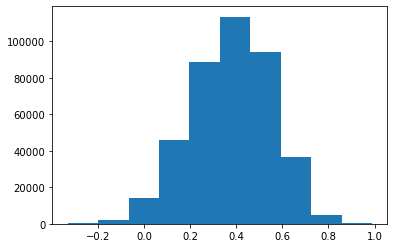

In [18]:
plt.hist(npcorrelation)
plt.show()

In [19]:
#nx.write_gexf(g, "test.gexf")

In [20]:
# Count node invovle in the connected comm
t = 0
de = g.degree
for item in de:
    if item[1] > 0:
        t=t+1
        
print(t)

591


In [21]:
QUANTILE

0.97725